In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
# This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946355e+07,1.946355e+07,False,NaN,1,NaN,NaN,None,2023-08-21T07:57:00.000Z,26000.835091,9.493721e+09,-4.0675,-0.154116,-0.314044,-11.510592,-13.204321,-13.612949,-4.764447,5.060686e+11,48.0202,5.460175e+11,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
1,1027,Ethereum,ETH,ethereum,7239,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202152e+08,1.202152e+08,True,NaN,2,NaN,NaN,None,2023-08-21T07:57:00.000Z,1670.241597,4.099163e+09,-10.9129,-0.087159,0.296072,-9.609456,-11.721179,-12.590062,-9.876318,2.007883e+11,19.0493,2.007883e+11,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
2,825,Tether USDt,USDT,tether,59801,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-21T07:57:00.000Z,0.999500,1.642388e+10,-3.8302,-0.013295,-0.039705,0.082748,-0.056800,-0.031364,-0.062168,8.280506e+10,7.8584,8.664091e+10,None,2023-08-21T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 08:00:41.046609
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538517e+08,1.538517e+08,False,NaN,4,NaN,NaN,None,2023-08-21T07:57:00.000Z,214.766841,3.096665e+08,-31.8913,-0.340596,-0.485667,-10.629898,-11.919049,-14.748436,-31.461984,3.304225e+10,3.1348,3.304225e+10,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-21T07:57:00.000Z,0.519864,1.628034e+09,50.9656,-1.054870,-1.397075,-17.039739,-32.885837,1.616902,12.379111,2.747056e+10,2.6066,5.198636e+10,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
5,3408,USD Coin,USDC,usd-coin,13680,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.597960e+10,2.597960e+10,False,NaN,6,NaN,NaN,None,2023-08-21T07:57:00.000Z,0.999955,2.304089e+09,-0.1617,0.001570,-0.005303,-0.004449,-0.006629,0.004216,0.000050,2.597843e+10,2.4651,2.597843e+10,None,2023-08-21T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 08:00:41.046609
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504917e+10,3.609196e+10,False,NaN,7,NaN,NaN,None,2023-08-21T07:57:00.000Z,0.267542,1.570273e+08,8.5103,-0.332802,0.655041,-7.765949,-14.519239,-11.730379,-27.831624,9.377116e+09,0.8898,1.203938e+10,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406769e+11,1.406769e+11,True,NaN,8,NaN,NaN,None,2023-08-21T07:57:00.000Z,0.063141,2.149027e+08,-2.3410,-0.399716,-1.550473,-15.707966,-12.977705,-7.427276,-13.748323,8.882424e+09,0.8430,8.882424e+09,None,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem

In [19]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    
    # Use this if you want to create csv and append data
    #df = pd.json_normalize(data['data'])
    #df['timestamp'] = pd.to_datetime('now')
    #df
    
    #if not os.path.isfile(r'C:\Users\user\api.csv'):
    #    df.to_csv(r'C:\Users\user\api.csv', header ='column_names')
    #else :
    #    df.to_csv(r'C:\Users\user\api.csv', mode = 'a', header=False)

In [20]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed')
    sleep(60) #sleep for 1 minute
exit()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_12228\2786272042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_12228\2786272042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_12228\2786272042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_12228\2786272042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


C:\Users\user\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:2224: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  result, tz_parsed = tslib.array_to_datetime(
C:\Users\user\AppData\Local\Temp\ipykernel_12228\2786272042.py:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df2)


API Runner Completed


KeyboardInterrupt: 

In [17]:
df3 = pd.read_csv(r'C:\Users\user\api.csv')
df3

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.946355e+07,1.946355e+07,False,NaN,1,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,26000.835091,9.493721e+09,-4.0675,-0.154116,-0.314044,-11.510592,-13.204321,-13.612949,-4.764447,5.060686e+11,48.0202,5.460175e+11,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
1,1,1027,Ethereum,ETH,ethereum,7239,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.202152e+08,1.202152e+08,True,NaN,2,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,1670.241597,4.099163e+09,-10.9129,-0.087159,0.296072,-9.609456,-11.721179,-12.590062,-9.876318,2.007883e+11,19.0493,2.007883e+11,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
2,2,825,Tether USDt,USDT,tether,59801,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,0.999500,1.642388e+10,-3.8302,-0.013295,-0.039705,0.082748,-0.056800,-0.031364,-0.062168,8.280506e+10,7.8584,8.664091e+10,NaN,2023-08-21T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 08:00:41.046609
3,3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.538517e+08,1.538517e+08,False,NaN,4,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,214.766841,3.096665e+08,-31.8913,-0.340596,-0.485667,-10.629898,-11.919049,-14.748436,-31.461984,3.304225e+10,3.1348,3.304225e+10,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
4,4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,0.519864,1.628034e+09,50.9656,-1.054870,-1.397075,-17.039739,-32.885837,1.616902,12.379111,2.747056e+10,2.6066,5.198636e+10,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
5,5,3408,USD Coin,USDC,usd-coin,13680,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,2.597960e+10,2.597960e+10,False,NaN,6,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,0.999955,2.304089e+09,-0.1617,0.001570,-0.005303,-0.004449,-0.006629,0.004216,0.000050,2.597843e+10,2.4651,2.597843e+10,NaN,2023-08-21T07:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 08:00:41.046609
6,6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.504917e+10,3.609196e+10,False,NaN,7,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,0.267542,1.570273e+08,8.5103,-0.332802,0.655041,-7.765949,-14.519239,-11.730379,-27.831624,9.377116e+09,0.8898,1.203938e+10,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.406769e+11,1.406769e+11,True,NaN,8,NaN,NaN,NaN,2023-08-21T07:57:00.000Z,0.063141,2.149027e+08,-2.3410,-0.399716,-1.550473,-15.707966,-12.977705,-7.427276,-13.748323,8.882424e+09,0.8430,8.882424e+09,NaN,2023-08-21T07:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:00:41.046609
8,8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"['pos', 'platform',

In [21]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.946368e+07,1.946368e+07,False,NaN,1,NaN,NaN,None,2023-08-21T08:36:00.000Z,26038.178125,9.594306e+09,-1.3953,0.084876,-0.217486,-11.536883,-13.053222,-13.394107,-4.587723,5.067988e+11,48.0621,5.468017e+11,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
1,1027,Ethereum,ETH,ethereum,7239,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202152e+08,1.202152e+08,True,NaN,2,NaN,NaN,None,2023-08-21T08:36:00.000Z,1671.560825,4.031420e+09,-13.3820,0.034500,0.231678,-9.616967,-11.699320,-12.313735,-9.845079,2.009469e+11,19.0569,2.009469e+11,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
2,825,Tether USDt,USDT,tether,59803,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.284648e+10,8.668426e+10,True,NaN,3,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.999399,1.648742e+10,-2.7134,-0.028431,-0.051608,0.051628,-0.067426,-0.057516,-0.081101,8.279670e+10,7.8501,8.663217e+10,None,2023-08-21T08:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 08:37:38.212200
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.538517e+08,1.538517e+08,False,NaN,4,NaN,NaN,None,2023-08-21T08:36:00.000Z,214.798247,3.126318e+08,-28.5419,0.140001,-0.571797,-10.731757,-11.915911,-14.678963,-31.487015,3.304708e+10,3.1340,3.304708e+10,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.284187e+10,9.998850e+10,False,NaN,5,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.519813,1.626183e+09,47.2508,-0.263928,-1.369036,-17.176422,-32.968133,1.627288,12.735717,2.746792e+10,2.6049,5.198135e+10,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
5,3408,USD Coin,USDC,usd-coin,13680,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.597989e+10,2.597989e+10,False,NaN,6,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.999922,2.338762e+09,2.6840,-0.018107,-0.010717,-0.026261,-0.013148,-0.009345,-0.006714,2.597788e+10,2.4636,2.597788e+10,None,2023-08-21T08:36:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 08:37:38.212200
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.504957e+10,3.609196e+10,False,NaN,7,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.267413,1.570854e+08,8.3338,-0.073329,0.653034,-8.007302,-14.646720,-11.290661,-27.747667,9.372704e+09,0.8889,1.203358e+10,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.406780e+11,1.406780e+11,True,NaN,8,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.063097,2.182213e+08,0.5770,-0.208895,-1.650760,-15.940528,-13.153866,-7.344443,-13.821724,8.876297e+09,0.8416,8.876297e+09,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
8,5426,Solana,SOL,solana,498,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, 

In [22]:
pd.set_option('display.float_format', lambda x:'%f' % x)

In [23]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.000000,19463681.000000,19463681.000000,False,NaN,1,NaN,NaN,None,2023-08-21T08:36:00.000Z,26038.178125,9594306387.004890,-1.395300,0.084876,-0.217486,-11.536883,-13.053222,-13.394107,-4.587723,506798792842.742249,48.062100,546801740621.289978,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
1,1027,Ethereum,ETH,ethereum,7239,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215150.719900,120215150.719900,True,NaN,2,NaN,NaN,None,2023-08-21T08:36:00.000Z,1671.560825,4031420469.177102,-13.382000,0.034500,0.231678,-9.616967,-11.699320,-12.313735,-9.845079,200946936475.381042,19.056900,200946936475.380005,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
2,825,Tether USDt,USDT,tether,59803,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82846484080.779160,86684257831.187607,True,NaN,3,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.999399,16487419240.557610,-2.713400,-0.028431,-0.051608,0.051628,-0.067426,-0.057516,-0.081101,82796703316.949921,7.850100,86632171027.330002,None,2023-08-21T08:36:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 08:37:38.212200
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153851723.458509,153851723.458509,False,NaN,4,NaN,NaN,None,2023-08-21T08:36:00.000Z,214.798247,312631835.354609,-28.541900,0.140001,-0.571797,-10.731757,-11.915911,-14.678963,-31.487015,33047080550.759251,3.134000,33047080550.759998,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.000000,52841868447.000000,99988501123.000000,False,NaN,5,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.519813,1626182803.720720,47.250800,-0.263928,-1.369036,-17.176422,-32.968133,1.627288,12.735717,27467915423.642635,2.604900,51981347804.139999,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
5,3408,USD Coin,USDC,usd-coin,13680,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25979890784.620438,25979890784.620438,False,NaN,6,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.999922,2338762251.756324,2.684000,-0.018107,-0.010717,-0.026261,-0.013148,-0.009345,-0.006714,25977877196.823883,2.463600,25977877196.820000,None,2023-08-21T08:36:00.000Z,1027.000000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 08:37:38.212200
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.000000,35049568982.301003,36091964625.425003,False,NaN,7,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.267413,157085442.517081,8.333800,-0.073329,0.653034,-8.007302,-14.646720,-11.290661,-27.747667,9372703686.794575,0.888900,12033576393.440001,None,2023-08-21T08:36:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 08:37:38.212200
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140678036383.705200,140678036383.705200,True,NaN,8,NaN,NaN,None,2023-08-21T08:36:00.000Z,0.063097,218221335.467595,0.5770

In [24]:
df4=df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df4

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.054696,-0.214625,-11.525200,-13.055289,-13.425582,-4.632162
Ethereum,0.016803,0.252633,-9.573303,-11.684985,-12.298507,-9.897845
Tether USDt,-0.013406,-0.040004,0.060532,-0.062452,-0.056614,-0.075915
BNB,0.086259,-0.584112,-10.734470,-11.923878,-14.680755,-31.477441
XRP,-0.133455,-1.370893,-17.184439,-33.081727,1.844604,12.806288
USD Coin,-0.008564,-0.002095,-0.016434,-0.012538,-0.003949,-0.006020
Cardano,-0.097554,0.634518,-8.058845,-14.673227,-11.338998,-27.739056
Dogecoin,-0.103737,-1.538404,-15.837956,-13.160704,-7.231941,-13.731094
Solana,-0.234332,-1.948994,-12.971606,-17.560018,23.300097,7.545349


In [25]:
df5=df4.stack()
df5

name                                     
Bitcoin      quote.USD.percent_change_1h      0.054696
             quote.USD.percent_change_24h    -0.214625
             quote.USD.percent_change_7d    -11.525200
             quote.USD.percent_change_30d   -13.055289
             quote.USD.percent_change_60d   -13.425582
             quote.USD.percent_change_90d    -4.632162
Ethereum     quote.USD.percent_change_1h      0.016803
             quote.USD.percent_change_24h     0.252633
             quote.USD.percent_change_7d     -9.573303
             quote.USD.percent_change_30d   -11.684985
             quote.USD.percent_change_60d   -12.298507
             quote.USD.percent_change_90d    -9.897845
Tether USDt  quote.USD.percent_change_1h     -0.013406
             quote.USD.percent_change_24h    -0.040004
             quote.USD.percent_change_7d      0.060532
             quote.USD.percent_change_30d    -0.062452
             quote.USD.percent_change_60d    -0.056614
             quote.USD.

In [26]:
df6 = df5.to_frame(name='values')
df6

values
name                                               
Bitcoin     quote.USD.percent_change_1h    0.054696
            quote.USD.percent_change_24h  -0.214625
            quote.USD.percent_change_7d  -11.525200
            quote.USD.percent_change_30d -13.055289
            quote.USD.percent_change_60d -13.425582
            quote.USD.percent_change_90d  -4.632162
Ethereum    quote.USD.percent_change_1h    0.016803
            quote.USD.percent_change_24h   0.252633
            quote.USD.percent_change_7d   -9.573303
            quote.USD.percent_change_30d -11.684985
            quote.USD.percent_change_60d -12.298507
            quote.USD.percent_change_90d  -9.897845
Tether USDt quote.USD.percent_change_1h   -0.013406
            quote.USD.percent_change_24h  -0.040004
            quote.USD.percent_change_7d    0.060532
            quote.USD.percent_change_30d  -0.062452
            quote.USD.percent_change_60d  -0.056614
            quote.USD.percent_change_90d  -0.075915
BNB         quote.USD.percent_change_1h    0.086259
            quote.USD.percent_change_24h  -0.584112
            quote.USD.percent_change_7d  -10.734470
            quote.USD.percent_change_30d -11.923878
            quote.USD.percent_change_60d -14.680755
            quote.USD.percent_change_90d -31.477441
XRP         quote.USD.percent_change_1h   -0.133455
            quote.USD.percent_change_24h  -1.370893
            quote.USD.percent_change_7d  -17.184439
            quote.USD.percent_change_30d -33.081727
            quote.USD.percent_change_60d   1.844604
            quote.USD.percent_change_90d  12.806288
USD Coin    quote.USD.percent_change_1h   -0.008564
            quote.USD.percent_change_24h  -0.002095
            quote.USD.percent_change_7d   -0.016434
            quote.USD.percent_change_30d  -0.012538
            quote.USD.percent_change_60d  -0.003949
            quote.USD.percent_change_90d  -0.006020
Cardano     quote.USD.percent_change_1h   -0.097554
            quote.USD.percent_change_24h   0.634518
            quote.USD.percent_change_7d   -8.058845
            quote.USD.percent_change_30d -14.673227
            quote.USD.percent_change_60d -11.338998
            quote.USD.percent_change_90d -27.739056
Dogecoin    quote.USD.percent_change_1h   -0.103737
            quote.USD.percent_change_24h  -1.538404
            quote.USD.percent_change_7d  -15.837956
            quote.USD.percent_change_30d -13.160704
            quote.USD.percent_change_60d  -7.231941
            quote.USD.percent_change_90d -13.731094
Solana      quote.USD.percent_change_1h   -0.234332
            quote.USD.percent_change_24h  -1.948994
            quote.USD.percent_change_7d  -12.971606
            quote.USD.percent_change_30d -17.560018
            quote.USD.percent_change_60d  23.300097
            quote.USD.percent_change_90d   7.545349
TRON        quote.USD.percent_change_1h    0.013103
            quote.USD.percent_change_24h   1.433941
            quote.USD.percent_change_7d   -2.381682
            quote.USD.percent_change_30d -12.901734
            quote.USD.percent_change_60d   3.059288
            quote.USD.percent_change_90d  -3.352395
Polkadot    quote.USD.percent_change_1h    0.116905
            quote.USD.percent_change_24h   0.001615
            quote.USD.percent_change_7d  -10.363169
            quote.USD.percent_change_30d -17.042602
            quote.USD.percent_change_60d  -8.592558
            quote.USD.percent_change_90d -16.574924
Dai         quote.USD.percent_change_1h    0.017994
            quote.USD.percent_change_24h  -0.059620
            quote.USD.percent_change_7d   -0.073890
            quote.USD.percent_change_30d  -0.052673
            quote.USD.percent_change_60d  -0.046303
            quote.USD.percent_change_90d  -0.069005
Polygon     quote.USD.percent_change_1h   -0.105704
            quote.USD.percent_change_24h  -0.240165
            quote.USD.percent_change_7d  -16.179142
            quote.USD.percent_change_30d 

In [27]:
df6.count()

values    90
dtype: int64

In [31]:
index = pd.Index(range(90))

df7 = df6.reset_index()
df7

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.054696
1,Bitcoin,quote.USD.percent_change_24h,-0.214625
2,Bitcoin,quote.USD.percent_change_7d,-11.525200
3,Bitcoin,quote.USD.percent_change_30d,-13.055289
4,Bitcoin,quote.USD.percent_change_60d,-13.425582
5,Bitcoin,quote.USD.percent_change_90d,-4.632162
6,Ethereum,quote.USD.percent_change_1h,0.016803
7,Ethereum,quote.USD.percent_change_24h,0.252633
8,Ethereum,quote.USD.percent_change_7d,-9.573303
9,Ethereum,quote.USD.percent_change_30d,-11.684985


In [41]:
df8 = df7.rename(columns={'level_1' : 'percent_change'})
df8

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.054696
1,Bitcoin,quote.USD.percent_change_24h,-0.214625
2,Bitcoin,quote.USD.percent_change_7d,-11.525200
3,Bitcoin,quote.USD.percent_change_30d,-13.055289
4,Bitcoin,quote.USD.percent_change_60d,-13.425582
5,Bitcoin,quote.USD.percent_change_90d,-4.632162
6,Ethereum,quote.USD.percent_change_1h,0.016803
7,Ethereum,quote.USD.percent_change_24h,0.252633
8,Ethereum,quote.USD.percent_change_7d,-9.573303
9,Ethereum,quote.USD.percent_change_30d,-11.684985


In [42]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df8


,name,percent_change,values
0,Bitcoin,1h,0.054696
1,Bitcoin,24h,-0.214625
2,Bitcoin,7d,-11.525200
3,Bitcoin,30d,-13.055289
4,Bitcoin,60d,-13.425582
5,Bitcoin,90d,-4.632162
6,Ethereum,1h,0.016803
7,Ethereum,24h,0.252633
8,Ethereum,7d,-9.573303
9,Ethereum,30d,-11.684985


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

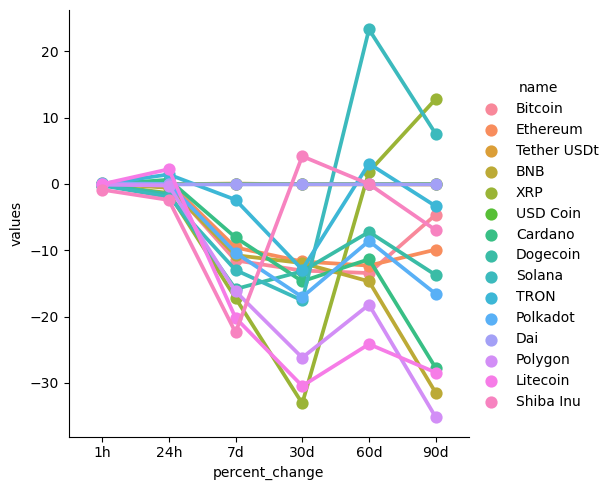

In [43]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [46]:
df9 = df[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,26038.178125,2023-08-21 08:37:38.212200
0,Bitcoin,26037.649607,2023-08-21 08:43:16.370206
0,Bitcoin,26033.044462,2023-08-21 08:44:19.970263
0,Bitcoin,26035.375954,2023-08-21 08:45:21.927070
0,Bitcoin,26035.113683,2023-08-21 08:46:22.907832
0,Bitcoin,26035.731686,2023-08-21 08:47:23.855855


<AxesSubplot: xlabel='timestamp', ylabel='quote.USD.price'>

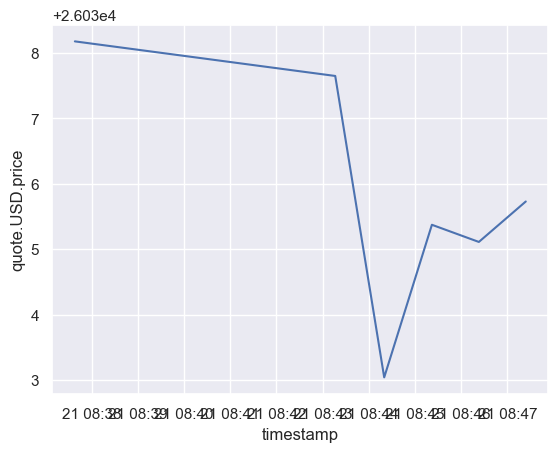

In [47]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)